In [57]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Read files and setup varibles

path = '/storage/arnaud/tank_odor_field_2024_06_13/'

total_odor_mean = np.zeros((1000, 1000)) # large 2d array to save the average traslated odor field for all source positions
mean_source_y = 500 # source x position for the averaged field
mean_source_x = 500 # source y position for the averaged field

contour_levels = [-4, -3, -2, -1]

files = os.listdir(path) # files containing data from differnet source positions

source_num = len(files) # variable to count number of different source positions

In [59]:
# Get sample data to read start and end times
sample_data = h5py.File(path + files[0], 'r')

thresh_scale = 5
thresh = 3 / 10**(thresh_scale)

time_slices = sample_data['odor_base']
time_slices = sorted([int(key_name) for key_name in time_slices.keys()])

experiment_end_time = 900 # seconds = 15minuts

start_time = min(time_slices)
end_time = min(max(time_slices), experiment_end_time)

In [60]:
for file in files:
    data = h5py.File(path + file,'r')

    # Gathering data
    odor = data['odor_base']
    odor_data = [odor[str(time)] for time in range(start_time, end_time)]
    odor_data_array = np.array(odor_data)

    # Computing mean
    odor_mean = np.mean(odor_data_array > thresh, axis=0)

    # compute the odor source position
    source_y, source_x = np.unravel_index(np.argmax(odor_data_array[0]), shape=odor_data_array[0].shape)

    # translate the mean odor field and ad it to the total_odor_mean field
    total_odor_mean[(mean_source_y - source_y) : (mean_source_y - source_y + odor_mean.shape[0]),
                    (mean_source_x - source_x) : (mean_source_x - source_x + odor_mean.shape[1])] += odor_mean

total_odor_mean /= source_num

In [61]:
odor_mean.shape

(408, 488)

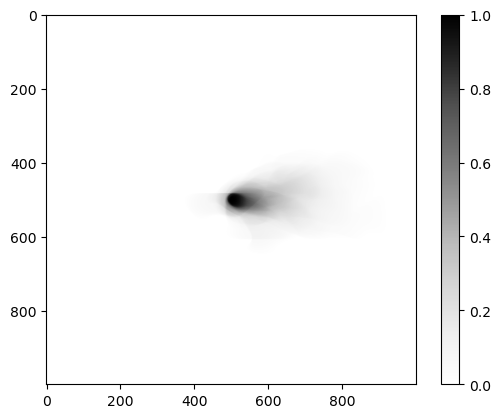

In [62]:
plt.imshow(total_odor_mean, cmap='Greys')
plt.colorbar()

In [63]:
# threshold = -4.0
# # total_odor_mean[total_odor_mean<=10**threshold] = 10**(-20)
# plt.imshow(np.log10(total_odor_mean),origin='lower',vmin=threshold,vmax=0,interpolation='bilinear',cmap='viridis',alpha=1)
# plt.contour(np.log10(total_odor_mean), levels=contour_levels, colors='white')

In [64]:
np.save(f'./average_15min_odor_base_3e{thresh_scale}.npy', total_odor_mean)